In [4]:
pip install investpy

In [5]:
import investpy
import pandas as pd
import numpy as np

ticker=['India 3M','India 6M','India 1Y','India 2Y','India 3Y','India 4Y','India 5Y',
        "India 6Y","India 7Y","India 8Y","India 9Y","India 10Y","India 11Y","India 12Y",
        "India 13Y","India 14Y","India 15Y","India 19Y","India 24Y","India 30Y"]
india_bond_data=pd.DataFrame();
new_column=list()

In [6]:
for item in ticker:
  data = investpy.get_bond_historical_data(bond=item, from_date='01/01/2010', to_date='01/05/2022')
  india_bond_data=pd.concat([india_bond_data,data.Close],axis=1)

In [7]:
for item in ticker:
  new_column.append(item.replace("India ",""))
print(new_column)


['3M', '6M', '1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', '11Y', '12Y', '13Y', '14Y', '15Y', '19Y', '24Y', '30Y']


In [12]:
india_bond_data.columns=new_column
len(india_bond_data)



3215

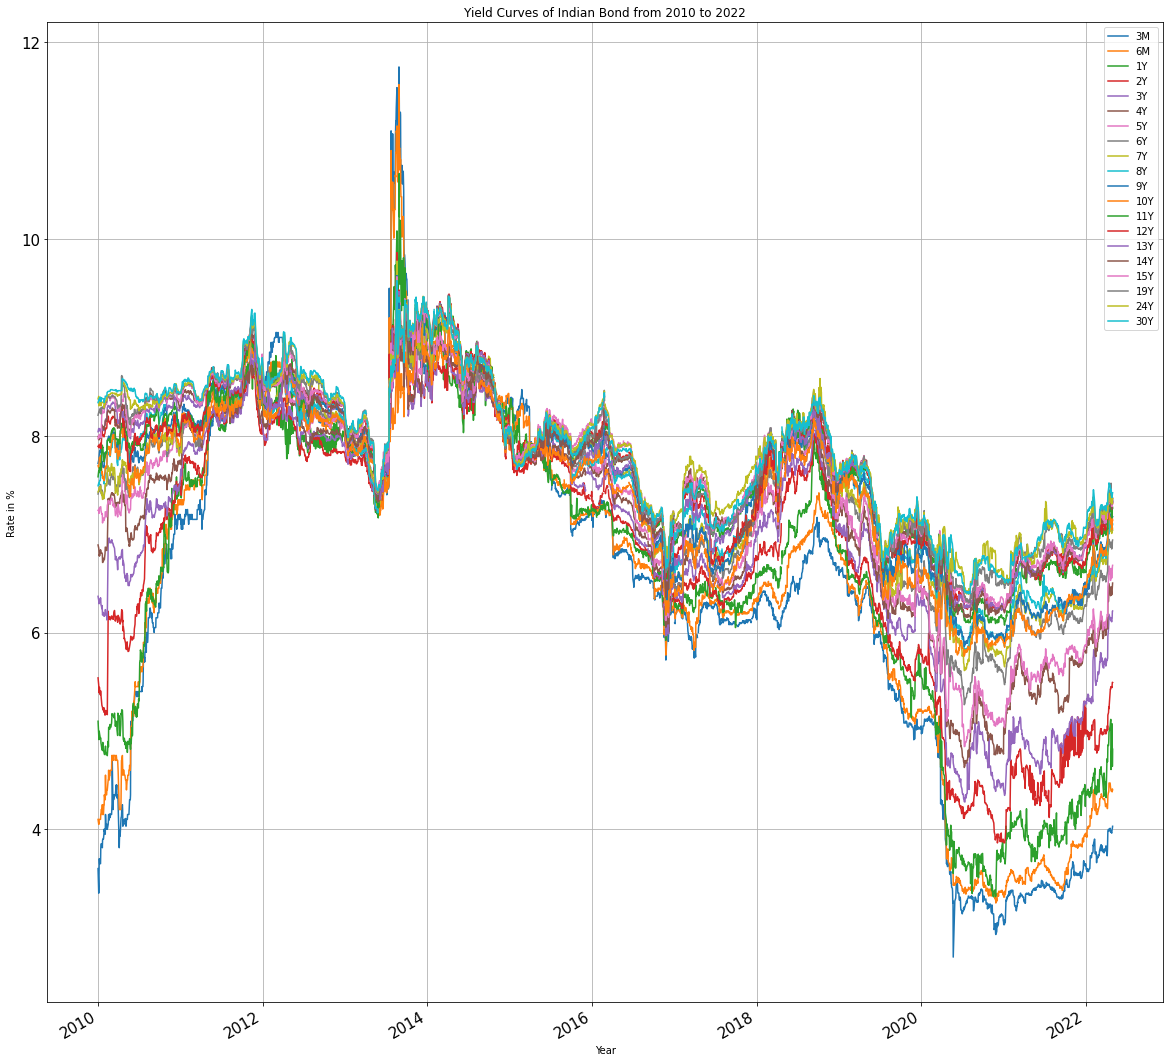

In [13]:
india_bond_data.plot(title="Yield Curves of Indian Bond from 2010 to 2022",
                     ylabel='Rate in %',
                     xlabel='Year',
                     fontsize=15,
                     legend=True,
                     grid=True,
                     figsize=(20,20));

In [18]:
data_nifty_50=investpy.get_index_historical_data('NIFTY 50',"india",from_date='01/01/2010', to_date='01/05/2022')
data_nifty_bank=investpy.get_index_historical_data('NIFTY BANK',"india",from_date='01/01/2010', to_date='01/05/2022')

In [19]:
data_nifty_50=data_nifty_50.Close
data_nifty_bank=data_nifty_bank.Close

In [36]:
spread_high_interval=-india_bond_data["1Y"]+india_bond_data["15Y"]
spread_med_interval=-india_bond_data["2Y"]+india_bond_data["10Y"]
spread_low_interval=-india_bond_data["6M"]+india_bond_data["5Y"]


In [102]:

max(data_nifty_50)

18477.05

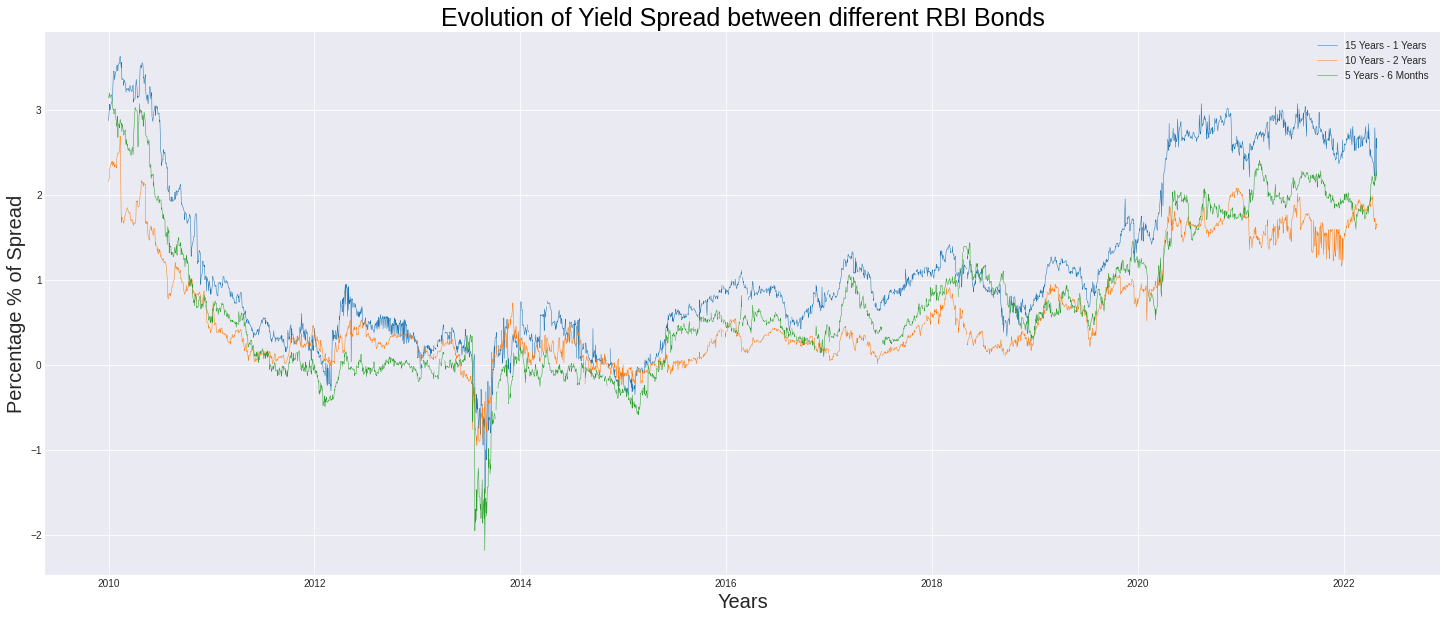

In [90]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(25,10))
plt.plot(spread_high_interval,linewidth=0.5,label='15 Years - 1 Years')
plt.plot(spread_med_interval,linewidth=0.5,label="10 Years - 2 Years ")
plt.plot(spread_low_interval,linewidth=0.5,label="5 Years - 6 Months ")
plt.legend()

plt.title("Evolution of Yield Spread between different RBI Bonds", loc='center', fontsize=25, fontweight=8, color='black')
plt.ylabel("Percentage % of Spread",fontsize=20)
plt.xlabel("Years",fontsize=20)

plt.show()

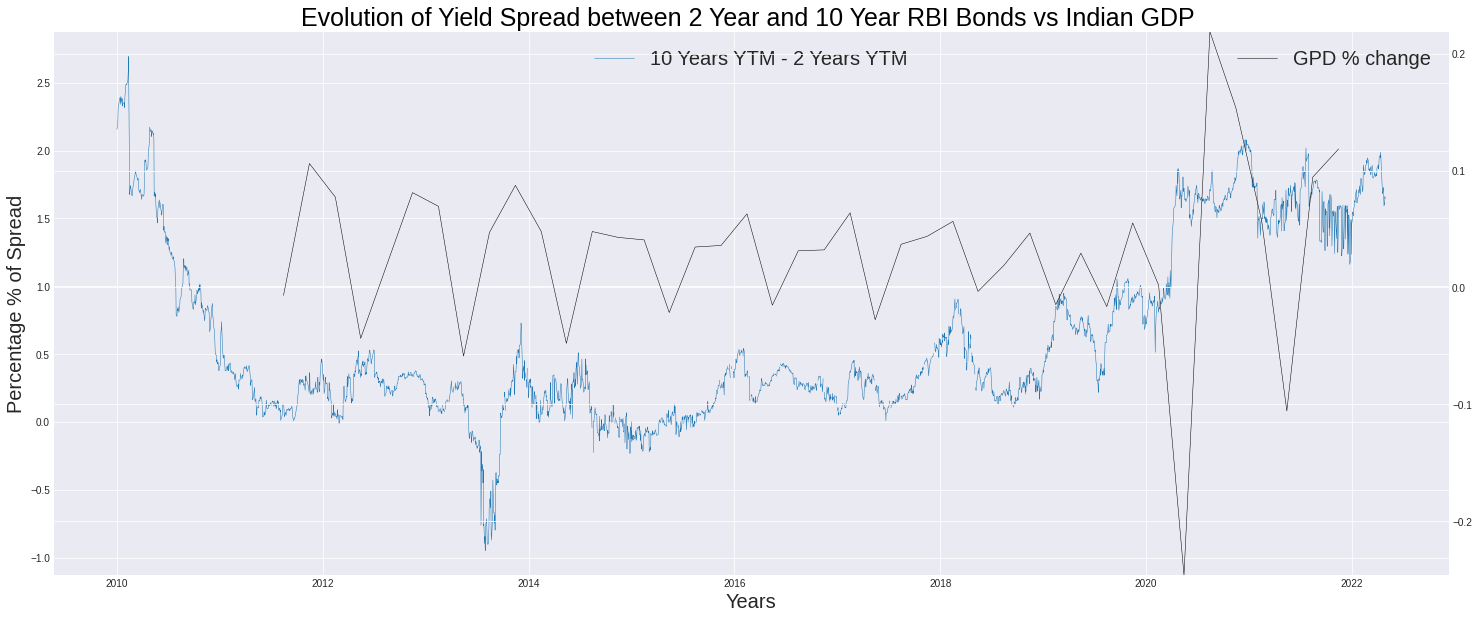

In [245]:
plt.style.use('seaborn-darkgrid')
fig, ax1 = plt.subplots(figsize=(25, 10))
ax2 = ax1.twinx()  
ax2.set_ylim(min(x), max(x));



ax1.plot(spread_med_interval,linewidth=0.5,label="10 Years YTM - 2 Years YTM")
# ax1.plot(spread_low_interval,linewidth=0.5,label="5 Years - 6 Months ")
ax1.legend(loc='upper center',fontsize=20)

plt.title("Evolution of Yield Spread between 2 Year and 10 Year RBI Bonds vs Indian GDP ", loc='center', fontsize=25, fontweight=8, color='black')
ax1.set_ylabel("Percentage % of Spread",fontsize=20)
ax1.set_xlabel("Years",fontsize=20)
ax2.plot(x,linewidth=0.5,color='black',alpha=1,label="GPD % change")
ax2.legend(fontsize=20)
plt.show();


In [233]:
m=pd.concat([x,spread_med_interval],axis=1)
m.corr()

,19. GDP,0
19. GDP,1.000000,-0.212921
0,-0.212921,1.000000


In [216]:
gdp=pd.read_csv('/content/GDP_QE_Current_Prices_2011-12-28.02.2022.csv',parse_dates=True,index_col="Year")

In [219]:
pd.to_datetime(gdp.index,format='%d-%m-%Y')


DatetimeIndex(['2011-05-15', '2011-08-15', '2011-11-15', '2012-02-15',
               '2012-05-15', '2012-08-15', '2012-11-15', '2013-02-15',
               '2013-05-15', '2013-08-15', '2013-11-15', '2014-02-15',
               '2014-05-15', '2014-08-15', '2014-11-15', '2015-02-15',
               '2015-05-15', '2015-08-15', '2015-11-15', '2016-02-15',
               '2016-05-15', '2016-08-15', '2016-11-15', '2017-02-15',
               '2017-05-15', '2017-08-15', '2017-11-15', '2018-02-15',
               '2018-05-15', '2018-08-15', '2018-11-15', '2019-02-15',
               '2019-05-15', '2019-08-15', '2019-11-15', '2020-02-15',
               '2020-05-15', '2020-08-15', '2020-11-15', '2021-02-15',
               '2021-05-15', '2021-08-15', '2021-11-15'],
              dtype='datetime64[ns]', name='Year', freq=None)

In [227]:
x=gdp["19. GDP"]
x=x.pct_change().dropna()
x

Year
2011-08-15   -0.006864
2011-11-15    0.106128
2012-02-15    0.077359
2012-05-15   -0.043543
2012-08-15    0.018913
2012-11-15    0.081217
2013-02-15    0.069496
2013-05-15   -0.058744
2013-08-15    0.047100
2013-11-15    0.087434
2014-02-15    0.047861
2014-05-15   -0.047856
2014-08-15    0.047896
2014-11-15    0.042874
2015-02-15    0.040739
2015-05-15   -0.021457
2015-08-15    0.034635
2015-11-15    0.035981
2016-02-15    0.063044
2016-05-15   -0.015163
2016-08-15    0.031415
2016-11-15    0.032202
2017-02-15    0.063939
2017-05-15   -0.027616
2017-08-15    0.037000
2017-11-15    0.043766
2018-02-15    0.056576
2018-05-15   -0.003341
2018-08-15    0.018963
2018-11-15    0.046602
2019-02-15   -0.014717
2019-05-15    0.029403
2019-08-15   -0.016349
2019-11-15    0.055281
2020-02-15    0.001935
2020-05-15   -0.246461
2020-08-15    0.219024
2020-11-15    0.153908
2021-02-15    0.056633
2021-05-15   -0.105750
2021-08-15    0.094480
2021-11-15    0.118653
Name: 19. GDP, dtype: float64